In [1]:
pip install forex-python


     ---------------------------------------- 75.5/75.5 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the ticker symbol for the Reliance index
reliance_symbol= 'RELIANCE.NS'


In [4]:
# Download historical data for Reliance from Yahoo Finance
data = yf.download(reliance_symbol, start='2007-01-01', end='2023-09-30', progress=False)


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-02,315.756927,318.431580,314.592987,317.218079,281.049713,4643207
2007-01-03,318.233459,319.694611,315.843628,318.122009,281.850647,6015404
2007-01-04,319.471741,321.948242,316.252258,317.119019,280.961975,12204290
2007-01-05,315.756927,324.920074,315.756927,319.013580,282.640564,12304038
2007-01-08,320.462341,320.462341,313.676666,316.215088,280.161133,8848507
...,...,...,...,...,...,...
2023-09-25,2350.399902,2360.699951,2335.100098,2340.449951,2340.449951,7127442
2023-09-26,2338.550049,2350.199951,2335.600098,2342.500000,2342.500000,5043891
2023-09-27,2343.500000,2371.800049,2338.500000,2368.899902,2368.899902,5861389


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-02,315.756927,318.431580,314.592987,317.218079,281.049713,4643207
2007-01-03,318.233459,319.694611,315.843628,318.122009,281.850647,6015404
2007-01-04,319.471741,321.948242,316.252258,317.119019,280.961975,12204290
2007-01-05,315.756927,324.920074,315.756927,319.013580,282.640564,12304038
2007-01-08,320.462341,320.462341,313.676666,316.215088,280.161133,8848507


In [7]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,2350.399902,2360.699951,2335.100098,2340.449951,2340.449951,7127442
2023-09-26,2338.550049,2350.199951,2335.600098,2342.500000,2342.500000,5043891
2023-09-27,2343.500000,2371.800049,2338.500000,2368.899902,2368.899902,5861389
2023-09-28,2383.000000,2383.000000,2325.000000,2334.100098,2334.100098,7259173
2023-09-29,2341.800049,2369.100098,2334.100098,2345.000000,2345.000000,6171007


In [8]:
data.shape

(4131, 6)

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000,4.131000e+03
mean,959.144787,970.190251,947.124532,958.206773,929.700604,9.759417e+06
std,744.224725,751.229833,736.662819,743.651698,751.648484,6.870529e+06
min,254.376266,268.381012,230.316833,252.481720,226.665833,0.000000e+00
25%,443.248444,448.065292,437.329544,442.400238,413.882904,5.527040e+06
50%,527.499817,533.517761,520.813232,526.707336,487.273041,7.712552e+06
75%,1279.868164,1289.031250,1267.014954,1279.397583,1256.029297,1.158651e+07
max,2856.149902,2856.149902,2797.000000,2841.850098,2831.846680,8.706178e+07


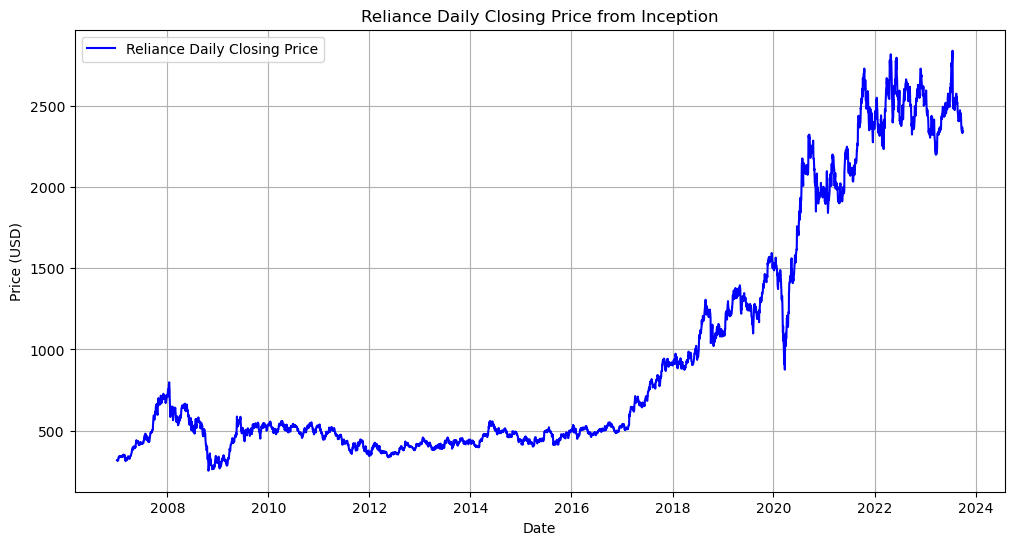

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(data.index,data['Close'], label='Reliance Daily Closing Price', color='b')
plt.title('Reliance Daily Closing Price from Inception')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.show()


In [12]:
# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()
import numpy as np

In [13]:
volatility = data["Returns"].std()

# Calculate daily, monthly, and annual volatility
daily_volatility = volatility
monthly_volatility = daily_volatility * np.sqrt(21)
annual_volatility = monthly_volatility * np.sqrt(12)

In [14]:
print("Reliance Volatility:")
print("Daily:", daily_volatility)
print("Monthly:", monthly_volatility)
print("Annual:", annual_volatility)

print("Reliance Returns:")
print("Average Daily Return:", data["Returns"].mean())
print("Total Return:",data["Adj Close"].iloc[-1] / data["Adj Close"].iloc[0])

Reliance Volatility:
Daily: 0.02060072693510941
Monthly: 0.09440439055125449
Annual: 0.32702640178469605
Reliance Returns:
Average Daily Return: 0.000725516813367562
Total Return: 8.343719599797469


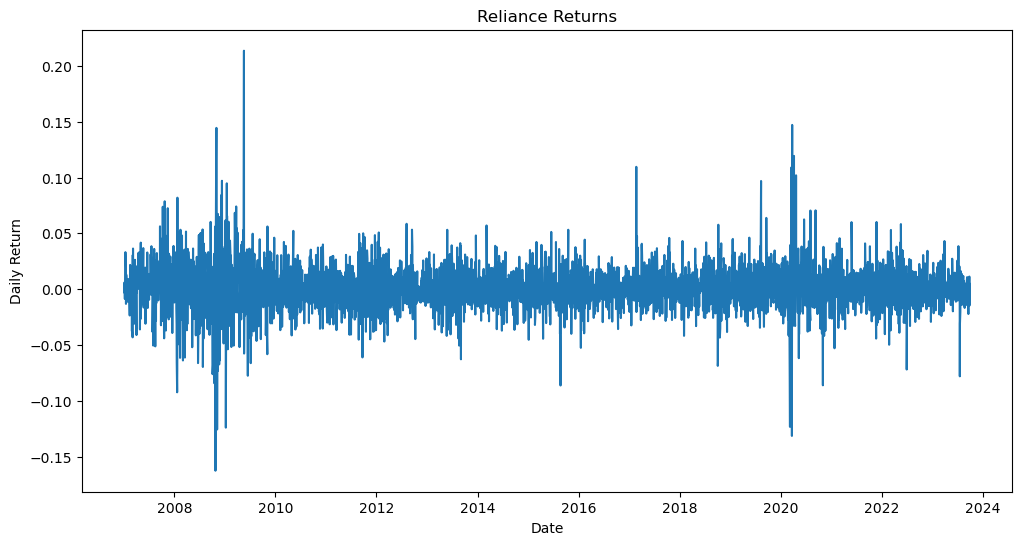

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(data.index,data["Returns"])
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Reliance Returns")
plt.show()

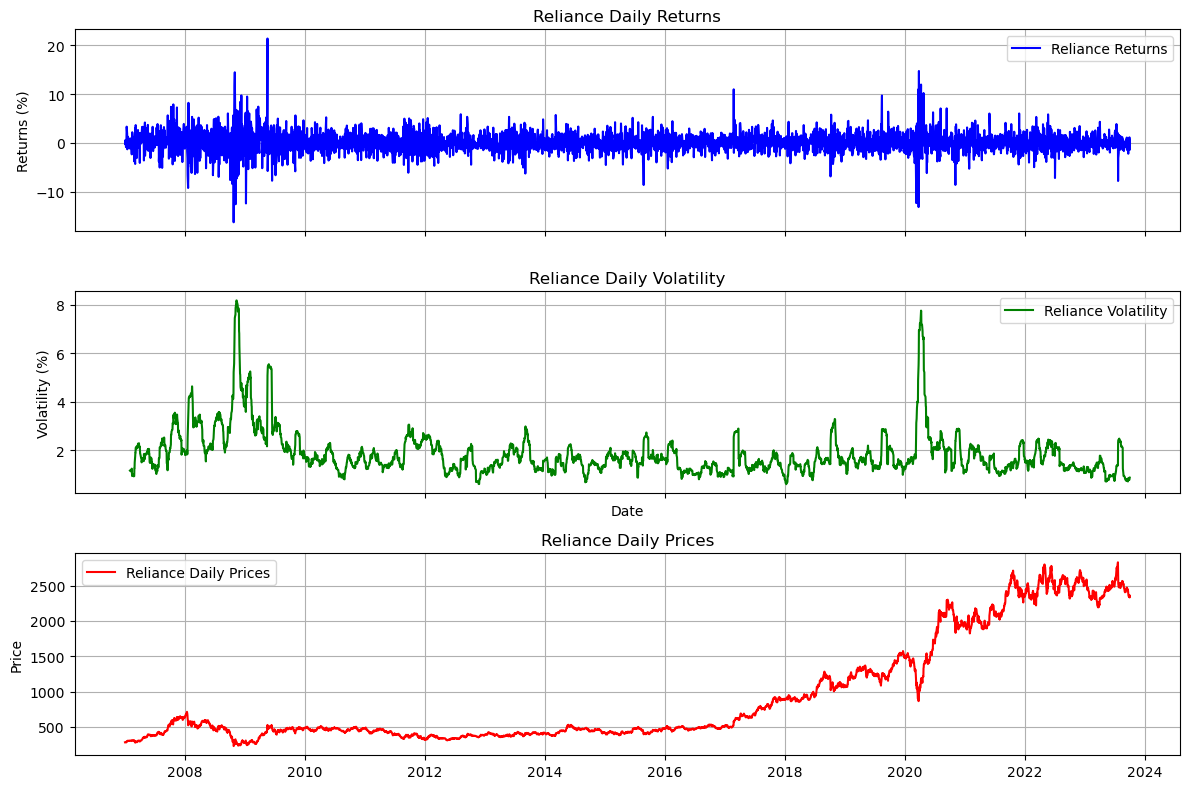

In [16]:
# Calculate daily returns for Reliance
data['Returns'] = data['Adj Close'].pct_change() * 100  # Calculate returns in percentage

# Calculate daily volatility (standard deviation of returns) for Reliance
data['Volatility'] = data['Returns'].rolling(window=20).std()  # 20-day rolling standard deviation

# Create a figure with two subplots
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot Reliance daily returns
ax1.plot(data.index,data['Returns'], label='Reliance Returns', color='b')
ax1.set_title('Reliance Daily Returns')
ax1.set_ylabel('Returns (%)')
ax1.legend()
ax1.grid(True)


ax2.plot(data.index,data['Volatility'], label='Reliance Volatility', color='g')
ax2.set_title('Reliance Daily Volatility')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility (%)')
ax2.legend()
ax2.grid(True)
# Plot Reliance daily prices
ax3.plot(data.index,data['Adj Close'], label='Reliance Daily Prices', color='r')
ax3.set_title('Reliance Daily Prices')
ax3.set_ylabel('Price')
ax3.legend()
ax3.grid(True)


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
#Reliance Industries daily price went low during '2008' to '2010' due to a combination of factors, including:

#The global financial crisis: The 2008 financial crisis was one of the worst economic downturns in recent history. It had a devastating impact on global markets, including the Indian stock market. Reliance Industries, being one of the largest companies in India, was not immune to the crisis.
#The fall in crude oil prices: Reliance Industries is a major oil and gas producer. The fall in crude oil prices in 2008 and 2009 had a significant impact on the company's revenue and profitability.
#The depreciation of the Indian rupee: The Indian rupee depreciated sharply against the US dollar during the financial crisis. This made Reliance Industries' exports less competitive and increased its import costs.
#Concerns about the company's debt levels: Reliance Industries had a high level of debt even before the financial crisis. The crisis made it more difficult for the company to raise new debt and refinance its existing debt.
#As a result of these factors, Reliance Industries' share price fell from a high of ₹720 in October 2007 to a low of ₹308 in November 2008. The stock price started to recover in 2009, but it did not fully regain its pre-crisis levels until 2011.

#It is important to note that Reliance Industries was not the only company that was affected by the financial crisis. Many other Indian companies also saw their share prices fall during this period. However, Reliance Industries was one of the hardest-hit companies due to its large size and exposure to the oil and gas sector.

In [ ]:
#There are a few reasons why Reliance Industries' daily returns went in negative during 2008 to 2010.

#Global financial crisis: The global financial crisis of 2008 was the worst economic crisis since the Great Depression. It was caused by a number of factors, including the collapse of the US housing market, subprime mortgage lending, and risky investment practices by banks and other financial institutions. The crisis had a devastating impact on the global economy, and stock markets around the world plunged. Reliance Industries was not immune to the crisis, and its share price fell sharply.

#Reliance Industries business model: Reliance Industries is a diversified conglomerate with interests in energy, petrochemicals, telecommunications, and retail. The company is heavily exposed to the cyclical oil and gas sector, which was hit hard by the financial crisis. In addition, Reliance Industries' retail business also suffered during the crisis as consumer spending declined.

#Investor sentiment: The global financial crisis and the subsequent economic recession led to a sharp decline in investor sentiment. Investors were cautious and risk-averse, and they were reluctant to invest in stocks. This led to a sell-off in stocks, including Reliance Industries.

#The following are some of the specific events that contributed to Reliance Industries' negative daily returns during 2008 to 2010:

#September 2008: Reliance Industries' share price fell by 17% in a single day following the collapse of Lehman Brothers, one of the largest investment banks in the world.
#October 2008: The Indian government announced a ban on crude oil exports, which had a negative impact on Reliance Industries' oil and gas business.
#November 2008: The global financial crisis led to a sharp decline in oil prices, which further hurt Reliance Industries' oil and gas business.
#March 2009: Reliance Industries reported its first quarterly loss in over a decade.
#April 2009: The Indian government raised taxes on the oil and gas sector, which further impacted Reliance Industries' profits.
#May 2009: The global economic recession led to a decline in demand for Reliance Industries' products and services.
#Reliance Industries' daily returns began to turn positive again in 2010, as the global economy began to recover from the financial crisis. However, it took the company several years to fully recover from the crisis.

#It is important to note that the stock market is volatile and there will always be periods of ups and downs. Investors should do their own research before investing in any stock, including Reliance Industries.

In [ ]:
#Reliance Industries' daily volatility went high during 2008 to 2010 due to a number of factors, including:

#The global financial crisis: The global financial crisis of 2008 was one of the worst economic downturns since the Great Depression. It had a significant impact on the Indian economy, including the stock market. The Sensex, India's benchmark stock index, fell by over 50% between January and October 2008. Reliance Industries, being one of the largest and most heavily traded stocks on the Indian stock market, was also affected by the crisis. Its share price fell by over 60% during this period.
#Reliance Industries' exposure to the нефти and gas sector: Reliance Industries is one of the largest producers of нефти and gas in India. The нефти and gas sector is cyclical, meaning that its performance is closely linked to the global economic cycle. During periods of economic downturn, demand for нефти and gas typically falls, which can lead to a decline in нефти and gas prices. This happened during the global financial crisis, which had a negative impact on Reliance Industries' performance.
#Uncertainty about Reliance Industries' future growth prospects: The global financial crisis also led to uncertainty about the future growth prospects of many companies, including Reliance Industries. This uncertainty was reflected in the high volatility of Reliance Industries' share price during this period.
#In addition to these factors, the following may have also contributed to the high volatility of Reliance Industries' daily volatility during 2008 to 2010:

#Increased speculation: The global financial crisis led to increased speculation in the stock market, as investors tried to profit from the volatility. This increased speculation may have also contributed to the high volatility of Reliance Industries' share price.
#Short-selling: Short-selling is a practice where investors sell borrowed shares with the expectation of buying them back at a lower price in the future. Short-selling can increase the volatility of a stock's price, as it can lead to a decline in the stock's price if there is a high level of short-selling. It is possible that short-selling also contributed to the high volatility of Reliance Industries' share price during this period.
#It is important to note that Reliance Industries' daily volatility has since decreased. However, it remains one of the more volatile stocks on the Indian stock market.

In [ ]:
#There are a few possible reasons why Reliance Industries (RIL) daily price went low after 2020:

#Global economic slowdown: The global economy slowed down significantly in 2020 due to the COVID-19 pandemic. This had a negative impact on demand for RIL's products and services, particularly in its oil and gas business.
#Weak crude oil prices: Crude oil prices fell sharply in 2020 due to oversupply and reduced demand. This hurt RIL's oil and gas business, which is a major contributor to its revenue and profits.
#Increased competition: RIL faces increasing competition from both domestic and global players in its various businesses. This competition is putting pressure on RIL's margins and profitability.
#Concerns about corporate governance: There have been some concerns about corporate governance at RIL in recent years. These concerns have weighed on the company's share price.
#In addition to these general factors, there have also been some specific events that have contributed to RIL's share price decline. For example, in 2021, the company's telecom arm, Jio, was fined by the Indian government for violating licensing rules. This news hurt investor confidence in the company.

#Overall, Reliance Industries' share price decline after 2020 is due to a combination of factors, including the global economic slowdown, weak crude oil prices, increased competition, and concerns about corporate governance.

#It is important to note that RIL is still a very strong company with a diversified business model. The company is well-positioned to benefit from India's growing economy and rising consumer spending. However, investors should be aware of the risks and challenges that the company faces before investing.

In [ ]:
#Reliance Industries' daily returns went negative after 2020 for a number of reasons, including:

#The global economic slowdown caused by the COVID-19 pandemic. Reliance Industries is a conglomerate with interests in a wide range of industries, including oil and gas, petrochemicals, retail, and telecommunications. The pandemic had a negative impact on all of these sectors, leading to lower demand for Reliance's products and services.
#Falling oil prices. Reliance Industries' oil and gas business is its largest revenue generator. Oil prices fell sharply in 2020 due to the pandemic-induced economic slowdown and a supply glut. This weighed heavily on Reliance's profits.
#Rising inflation. Inflation has been rising in India and other parts of the world in recent months. This has eroded the purchasing power of consumers and businesses, leading to lower demand for Reliance's products and services.
#Uncertainty about Reliance's new businesses. Reliance Industries has been investing heavily in new businesses such as e-commerce, digital services, and green energy. However, these businesses are still in their early stages of development and are not yet profitable. This uncertainty has weighed on Reliance's share price.
#In addition to these factors, Reliance Industries has also been facing some specific challenges, such as:

#Increased competition from foreign rivals. Reliance Industries is facing increased competition from foreign rivals in a number of its businesses, such as retail and telecommunications. This is putting pressure on Reliance's margins and profitability.
#Regulatory challenges. Reliance Industries has been facing a number of regulatory challenges in recent years, such as the government's decision to impose a windfall tax on oil and gas producers. These challenges have also weighed on Reliance's share price.
#Despite these challenges, Reliance Industries remains a strong company with a diversified business model. It is also well-positioned to benefit from India's long-term economic growth. However, investors are likely to remain cautious about Reliance in the near term, given the current economic uncertainty and regulatory challenges.

In [ ]:
#There are a few reasons why Reliance Industries' daily volatility went high after 2020:

#Increased investor interest. Reliance Industries is the largest company in India by market capitalization, and it has a wide range of businesses, including oil and gas, telecommunications, and retail. This makes it a popular stock for investors, both domestic and foreign. As a result, the stock is traded more frequently, which can lead to higher volatility.
#Changes in the company's business model. Reliance Industries has been undergoing a major transformation in recent years, shifting from a traditional oil and gas company to a more diversified conglomerate. This has involved investing heavily in new businesses, such as telecommunications and retail. These new businesses are more volatile than the company's traditional oil and gas business, which has contributed to the stock's overall volatility.
#Global economic uncertainty. The COVID-19 pandemic and the ongoing war in Ukraine have caused significant uncertainty in the global economy. This has led to increased volatility in stock markets around the world, including the Indian stock market. As a large-cap stock, Reliance Industries is particularly vulnerable to market volatility.
#In addition to these general factors, there have also been a number of specific events that have contributed to Reliance Industries' daily volatility in recent years. For example, the company's share price experienced significant volatility in 2020 following the announcement of its proposed merger with telecom rival Bharti Airtel. The merger was ultimately called off, but the announcement caused a great deal of uncertainty among investors.

#Overall, Reliance Industries' daily volatility has increased in recent years due to a combination of factors, including increased investor interest, changes in the company's business model, and global economic uncertainty.

#It is important to note that volatility is not necessarily a bad thing. In fact, it can create opportunities for investors to buy and sell the stock at attractive prices. However, investors should be aware of the risks associated with investing in a volatile stock like Reliance Industries

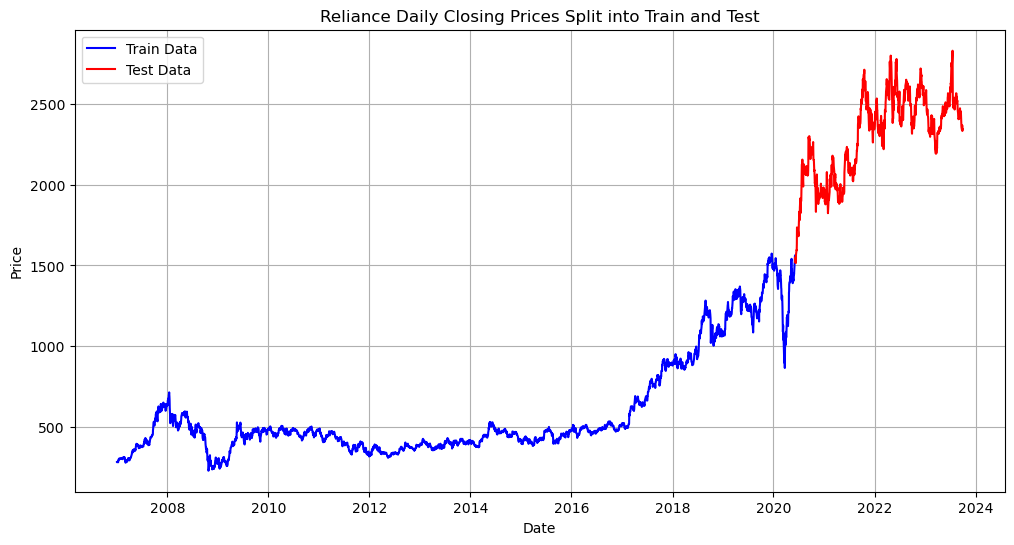

Total number of data points for Reliance: 4131
Size of train data for Reliance: 3304 data points
Size of test data for Reliance: 827 data points


In [18]:
# Calculate the number of data points for Reliance
num_data_points_reliance = len(data)

# Calculate the index where the split should occur (80% train, 20% test)
split_index_reliance = int(0.8 * num_data_points_reliance)

# Split the Reliance data into train (first 80%) and test (last 20%)
train_data_reliance = data[:split_index_reliance]
test_data_reliance = data[split_index_reliance:]

# Plotting Reliance daily closing prices
plt.figure(figsize=(12, 6))
plt.plot(train_data_reliance.index, train_data_reliance['Adj Close'], label='Train Data', color='b')
plt.plot(test_data_reliance.index, test_data_reliance['Adj Close'], label='Test Data', color='r')
plt.title('Reliance Daily Closing Prices Split into Train and Test')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Display the number of data points and the size of train and test data for NASDAQ 100
print(f"Total number of data points for Reliance: {num_data_points_reliance}")
print(f"Size of train data for Reliance: {len(train_data_reliance)} data points")
print(f"Size of test data for Reliance: {len(test_data_reliance)} data points")


[*********************100%%**********************]  1 of 1 completed


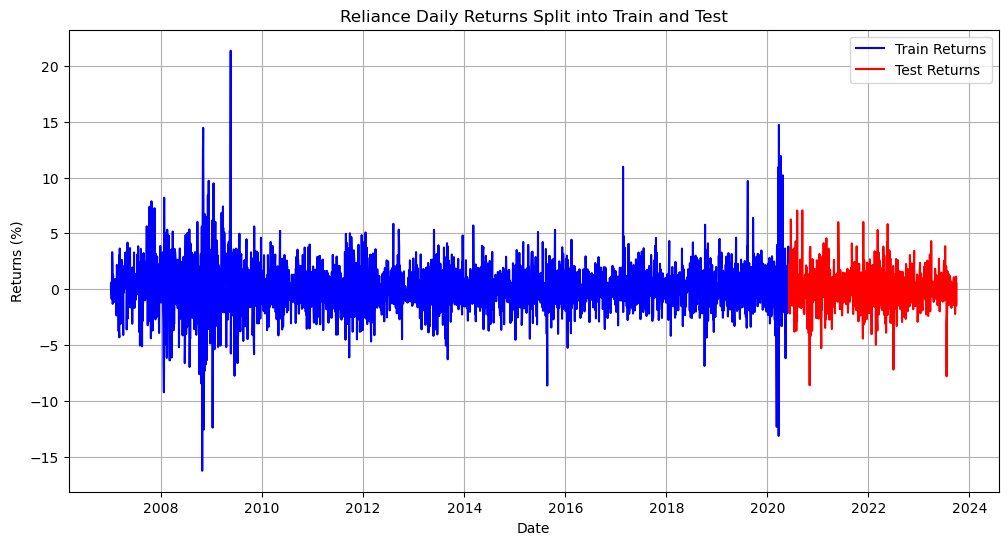

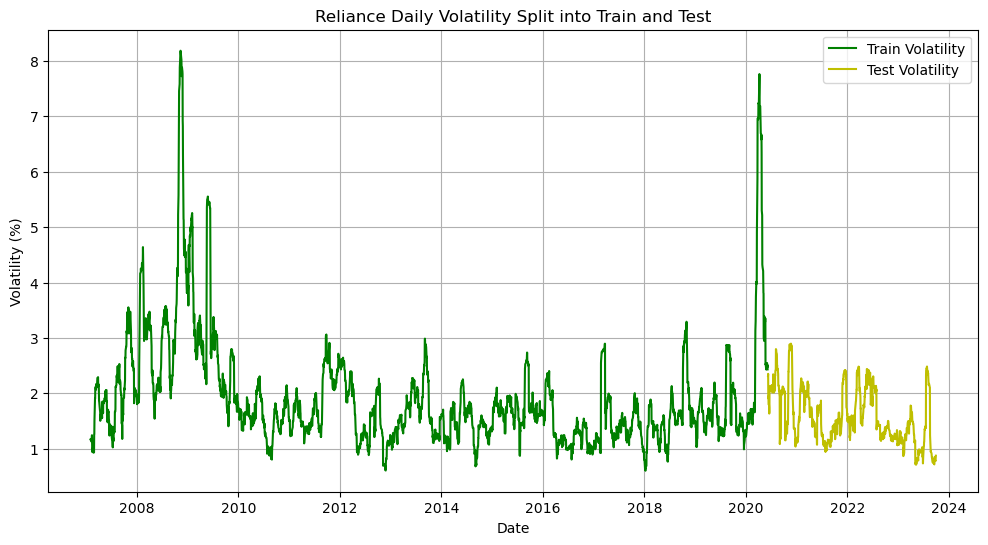

Total number of data points for RELIANCE: 4131
Size of train data for Returns for RELIANCE: 3304 data points
Size of test data for Returns for RELIANCE: 827 data points
Size of train data for Volatility for RELIANCE: 3304 data points
Size of test data for Volatility for RELIANCE: 827 data points


In [29]:
import yfinance as yf
import matplotlib.pyplot as plt

reliance_symbol = "RELIANCE.NS"
start_date_reliance = "2007-01-01"  # Start date of the desired time period
end_date_reliance = "2023-09-30"    # End date of the desired time period


data = yf.download(reliance_symbol, start=start_date_reliance, end=end_date_reliance)


data['Returns'] = data['Adj Close'].pct_change() * 100  # Calculate returns in percentage

# Calculate daily volatility (standard deviation of returns) for Reliance
data['Volatility'] = data['Returns'].rolling(window=20).std()  # 20-day rolling standard deviation


num_data_points = len(data)

# Calculate the index where the split should occur (80% train, 20% test) for NASDAQ 100
split_index = int(0.8 * num_data_points)

# Split the data into train (first 80%) and test (last 20%) for returns and volatility for NASDAQ 100
train_returns = data['Returns'][:split_index]
test_returns = data['Returns'][split_index:]

train_volatility = data['Volatility'][:split_index]
test_volatility = data['Volatility'][split_index:]

# Plotting Reliance daily returns for NASDAQ 100
plt.figure(figsize=(12, 6))
plt.plot(train_returns.index, train_returns, label='Train Returns', color='b')
plt.plot(test_returns.index, test_returns, label='Test Returns', color='r')
plt.title('Reliance Daily Returns Split into Train and Test')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid(True)

# Show the plot for returns for Reliance
plt.show()

# Plotting Reliance daily volatility for Reliance
plt.figure(figsize=(12, 6))
plt.plot(train_volatility.index, train_volatility, label='Train Volatility', color='g')
plt.plot(test_volatility.index, test_volatility, label='Test Volatility', color='y')
plt.title('Reliance Daily Volatility Split into Train and Test')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)

# Show the plot for volatility for Reliance
plt.show()

# Display the number of data points and the size of train and test data for returns and volatility for NASDAQ 100
print(f"Total number of data points for RELIANCE: {num_data_points}")
print(f"Size of train data for Returns for RELIANCE: {len(train_returns)} data points")
print(f"Size of test data for Returns for RELIANCE: {len(test_returns)} data points")
print(f"Size of train data for Volatility for RELIANCE: {len(train_volatility)} data points")
print(f"Size of test data for Volatility for RELIANCE: {len(test_volatility)} data points")


[*********************100%%**********************]  1 of 1 completed


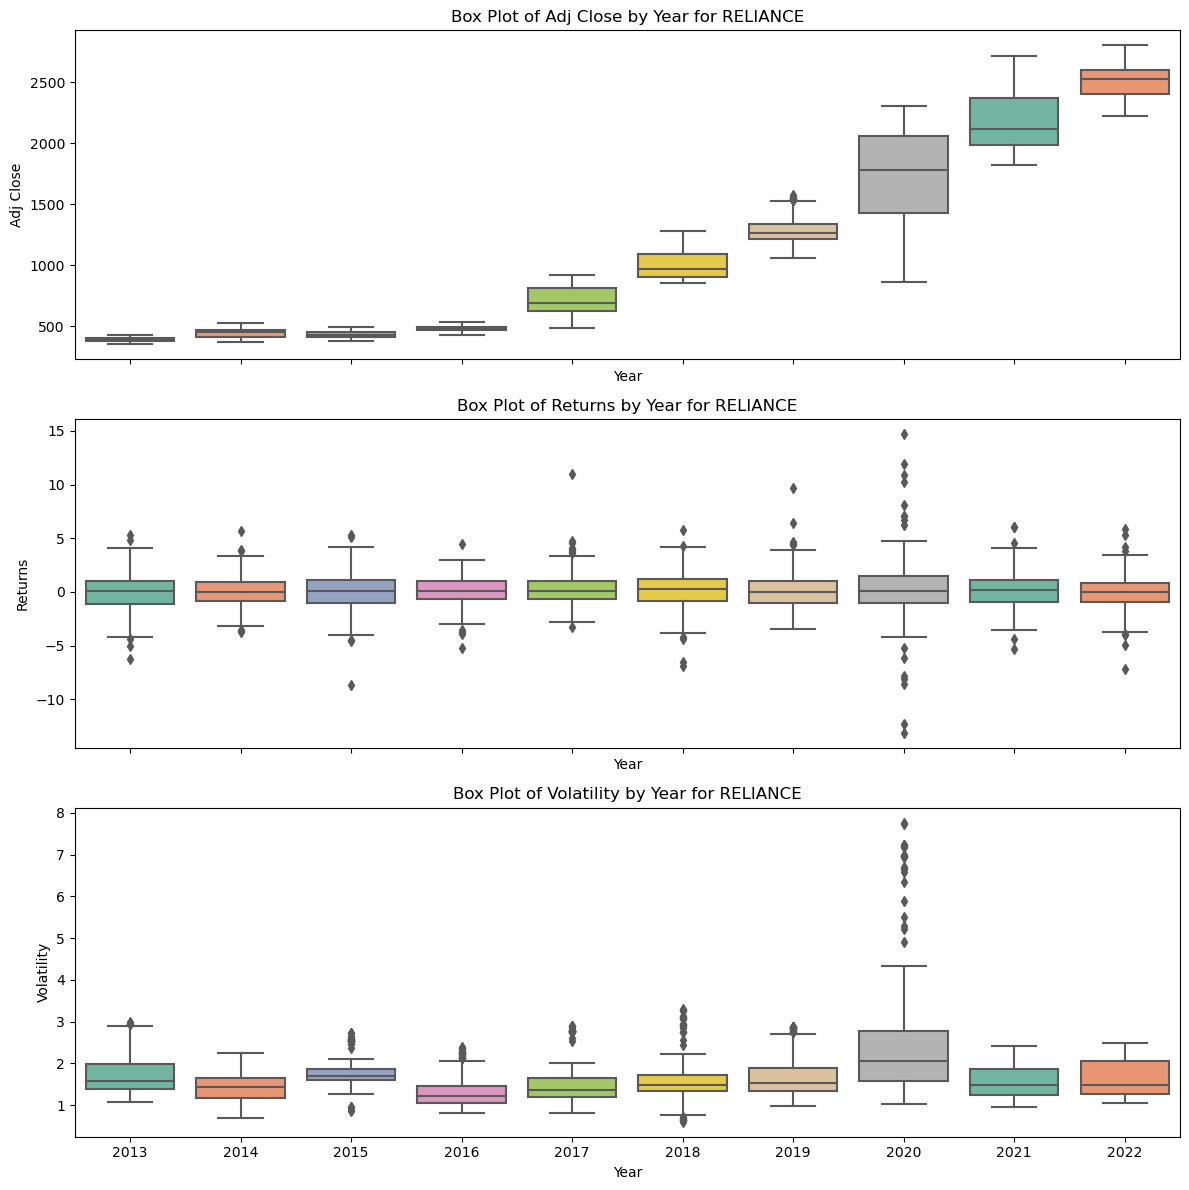

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock symbol and the desired time period for Reliance
reliance_symbol = "RELIANCE.NS"
start_date_reliance = "2013-01-01"  # Start date for 10 years of data
end_date_reliance = "2023-01-01"    # End date of the desired time period

# Fetch historical data from Yahoo Finance for Reliance for the specified time period
data = yf.download(reliance_symbol, start=start_date_reliance, end=end_date_reliance)


data['Returns'] = data['Adj Close'].pct_change() * 100  # Calculate returns in percentage

# Calculate daily volatility (standard deviation of returns) for Reliance
data['Volatility'] = data['Returns'].rolling(window=20).std()  # 20-day rolling standard deviation

# Extract the year from the date field and store it in a new column
data['Year'] = data.index.year

# Create a custom color palette for the box plots
custom_palette = sns.color_palette("Set2")

# Create subplots for box plots of Prices, Returns, and Volatility for Reliance
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Iterate over the metrics and create annual box plots for each for Reliance
metrics = ['Adj Close', 'Returns', 'Volatility']
for i, metric in enumerate(metrics):
    sns.boxplot(x='Year', y=metric, data=data, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Box Plot of {metric} by Year for RELIANCE')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Year')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot for Reliance with custom colors
plt.show()


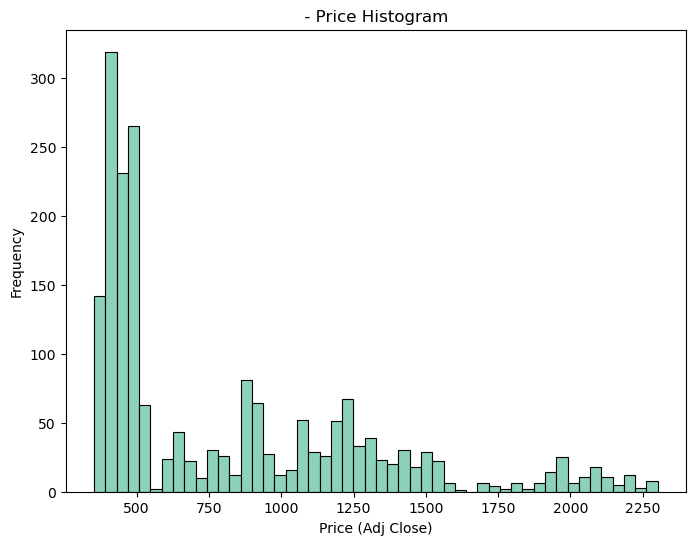

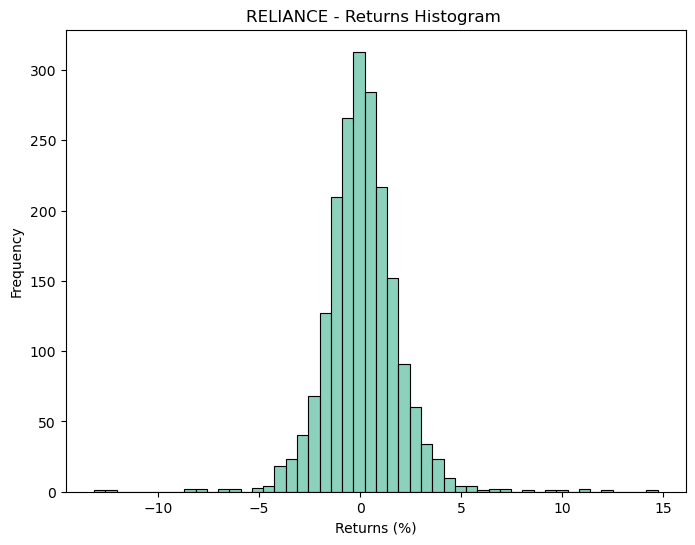

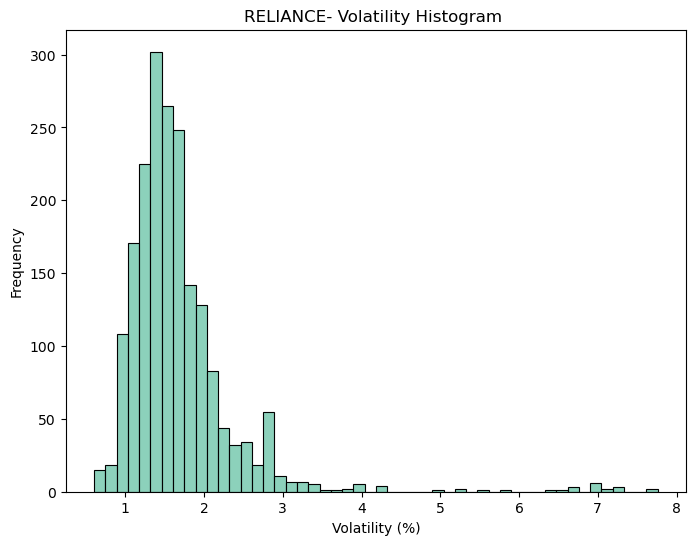

In [26]:
# Perform train-test split (80% train, 20% test)
train_size = int(0.8 * len(data))
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Create a custom color palette for the histograms
custom_palette = sns.color_palette("Set2")

# Histogram for "Adj Close" after train-test split
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Adj Close', bins=50, color=custom_palette[0])
plt.title(' - Price Histogram ')
plt.xlabel('Price (Adj Close)')
plt.ylabel('Frequency')
plt.show()

# Histogram for "Returns" after train-test split
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Returns', bins=50, color=custom_palette[0])
plt.title('RELIANCE - Returns Histogram ')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')
plt.show()

# Histogram for "Volatility" after train-test split
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Volatility', bins=50, color=custom_palette[0])
plt.title('RELIANCE- Volatility Histogram ')
plt.xlabel('Volatility (%)')
plt.ylabel('Frequency')
plt.show()

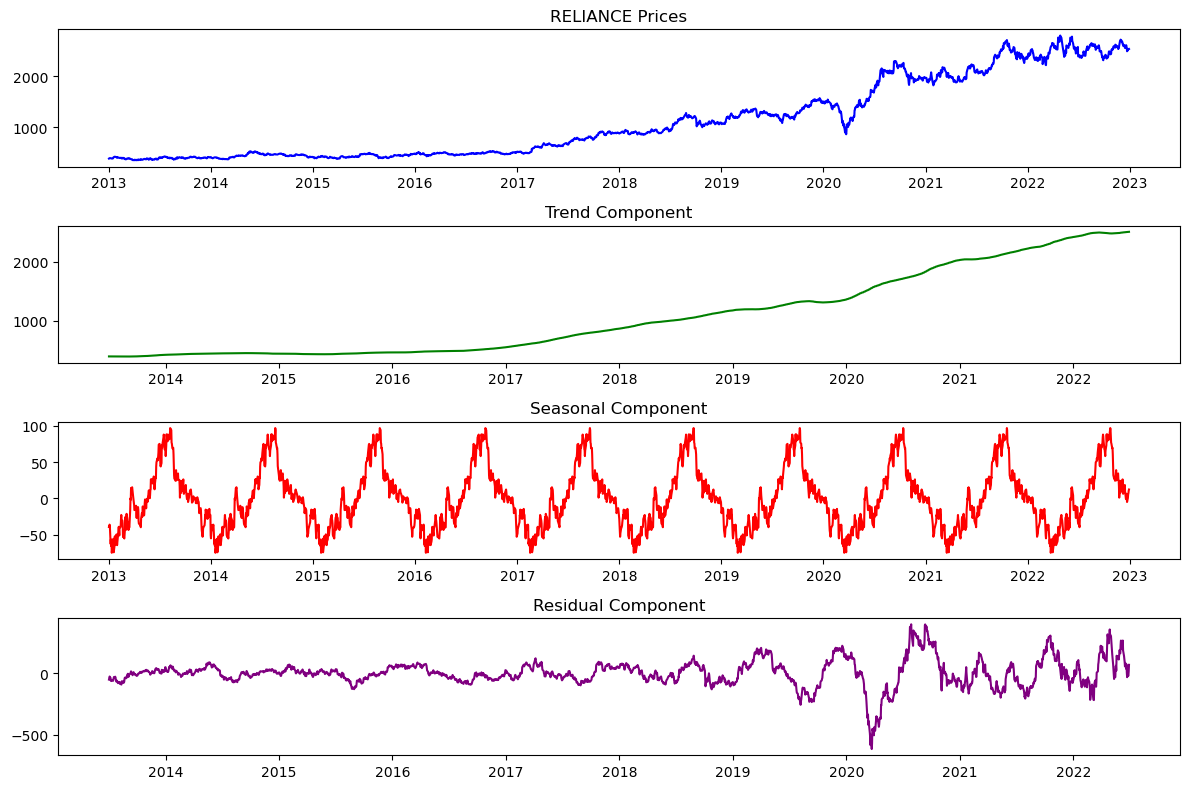

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose  # Import seasonal_decompose


reliance_prices = data['Adj Close']


result_reliance = seasonal_decompose(reliance_prices, model='additive', period=252)  # Using a yearly period (252 trading days)


trend_reliance = result_reliance.trend
seasonal_reliance = result_reliance.seasonal
residual_reliance = result_reliance.resid


plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(reliance_prices, label='Original Prices', color='blue')
plt.title('RELIANCE Prices')

plt.subplot(4, 1, 2)
plt.plot(trend_reliance, label='Trend', color='green')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal_reliance, label='Seasonal', color='red')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual_reliance, label='Residual', color='purple')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


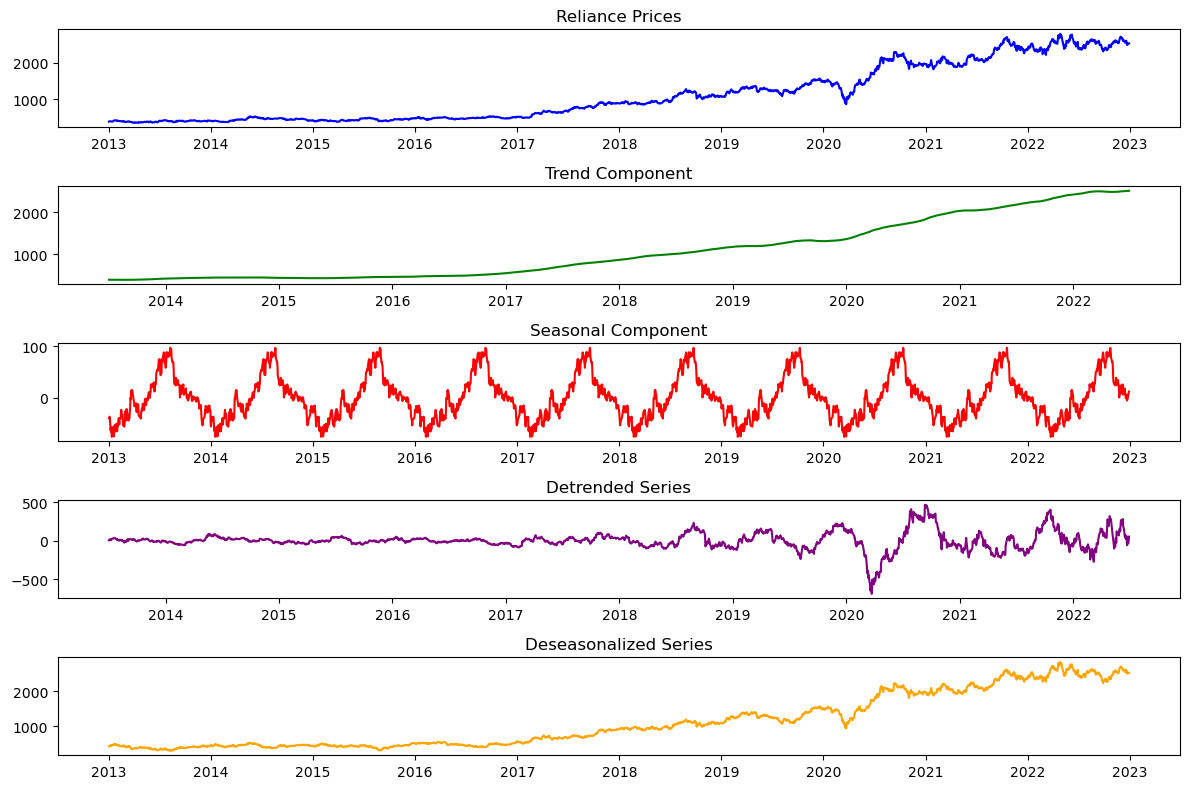

In [24]:
# Extract the adjusted closing prices
prices = data['Adj Close']

# Perform seasonal decomposition
result = seasonal_decompose(prices, model='additive', period=252)  # Using a yearly period (252 trading days)

# Extract the components: trend, seasonal, and residual
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Detrended and deseasonalized series
deseasonalized_series = prices - seasonal
detrended_series = prices - trend

# Plot the original series, trend, seasonal, detrended, and deseasonalized series
plt.figure(figsize=(12, 8))

plt.subplot(5, 1, 1)
plt.plot(prices, label='Original Prices', color='blue')
plt.title('Reliance Prices')

plt.subplot(5, 1, 2)
plt.plot(trend, label='Trend', color='green')
plt.title('Trend Component')

plt.subplot(5, 1, 3)
plt.plot(seasonal, label='Seasonal', color='red')
plt.title('Seasonal Component')

plt.subplot(5, 1, 4)
plt.plot(detrended_series, label='Detrended', color='purple')
plt.title('Detrended Series')

plt.subplot(5, 1, 5)
plt.plot(deseasonalized_series, label='Deseasonalized', color='orange')
plt.title('Deseasonalized Series')

plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


C:\Users\garim\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


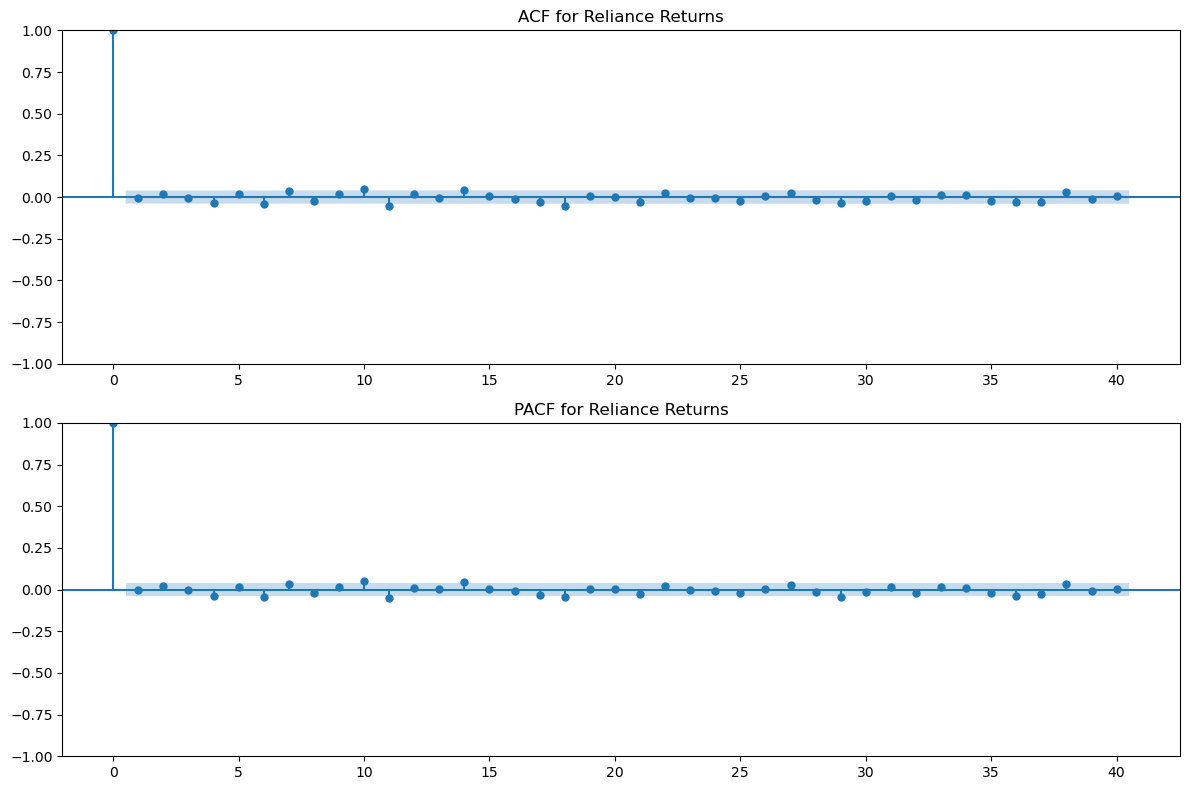

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define the stock symbol and the desired time period for Reliance
nasdaq_symbol = "RELIANCE.NS"
start_date_nasdaq = "2013-01-01"  # Start date for 10 years of data
end_date_nasdaq = "2023-01-01"    # End date of the desired time period

# Fetch historical data from Yahoo Finance for Reliance for the specified time period
data = yf.download(reliance_symbol, start=start_date_reliance, end=end_date_reliance)

# Extract the adjusted closing prices
prices = data['Adj Close']


returns = prices.pct_change().dropna()  # Calculate returns in percentage and remove NaNs

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(returns, lags=40, ax=ax1)
ax1.set_title('ACF for Reliance Returns')

# PACF plot
plot_pacf(returns, lags=40, ax=ax2)
ax2.set_title('PACF for Reliance Returns')

plt.tight_layout()
plt.show()


In [19]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller


reliance_symbol = "RELIANCE.NS"
start_date_reliance = "2013-01-01"  # Start date for 10 years of data
end_date_reliance = "2023-01-01"    # End date of the desired time period


data = yf.download(reliance_symbol, start=start_date_reliance, end=end_date_reliance)

# Extract the adjusted closing prices
prices = data['Adj Close']


returns = prices.pct_change().dropna()  # Calculate returns in percentage and remove NaNs

# Perform the ADF test
result = adfuller(returns)

# Print the ADF test results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])


[*********************100%%**********************]  1 of 1 completed
ADF Statistic: -15.152665916415588
p-value: 6.762639152791437e-28
Critical Values: {'1%': -3.43301536964955, '5%': -2.862717536880851, '10%': -2.5673968500527855}


In [ ]:
#based on the ADF Statistic, p-value, and Critical Values you provided, there is strong evidence to conclude that the NASDAQ 100 returns time series is stationary. This means that the statistical properties of the returns series do not change significantly over time, which is a desirable property for many time series analysis techniques.

In [70]:
pip install arch


In [72]:
import yfinance as yf
import pandas as pd
import arch  # Import the arch module
from arch import arch_model  

In [73]:
# Fit a GARCH(1, 1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
results = model.fit()

# Display model summary
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 23307477335.632755
Iteration:      2,   Func. Count:     18,   Neg. LLF: -7803.07683452591
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7803.076845573193
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7803.08
Distribution:                  Normal   AIC:                          -15598.2
Method:            Maximum Likelihood   BIC:                          -15574.8
                                        No. Observations:                 2517
Date:                Sun, Oct 08 2023   Df Residuals:                     2516
Time:          

C:\Users\garim\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00018. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
